Explained Variance using scikit-learn:  [1.69446527 0.31222369]
Principal Components using scikit-learn: 
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Explained Variance using custom implementation:  [1.69446527 0.31222369]
Principal Components using custom implementation: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


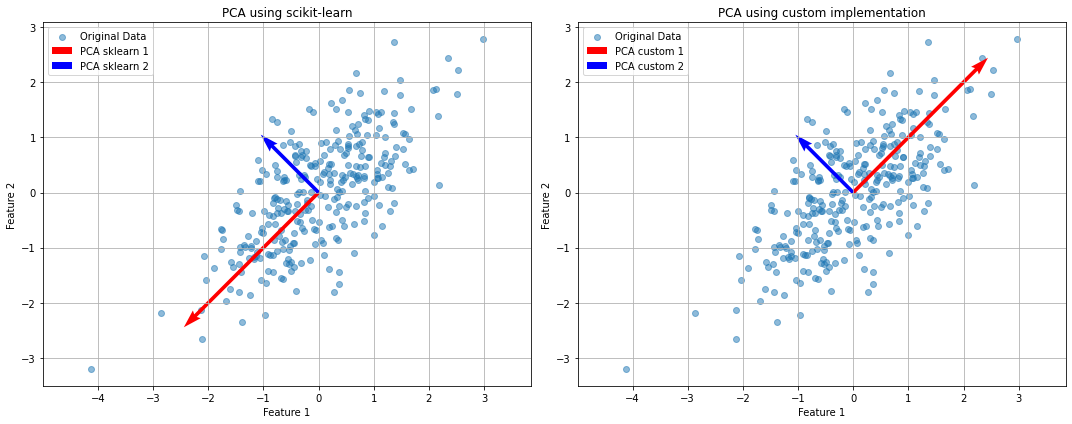

In [38]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = np.load('/home/mannvora/Desktop/CSE-575-SML/Assignments/ASSIGNMENT3/data.npy')
X_scaled = StandardScaler().fit_transform(X)

pca_sklearn = PCA(n_components=2)
pca_sklearn.fit(X_scaled)

cov = np.cov(X_scaled.T)
eig_val, eig_vec = np.linalg.eig(cov)

idx = eig_val.argsort()[::-1]
eig_val = eig_val[idx]
eig_vec = eig_vec[:, idx]

print("Explained Variance using scikit-learn: ", pca_sklearn.explained_variance_)
print("Principal Components using scikit-learn: \n", pca_sklearn.components_)
print("\nExplained Variance using custom implementation: ", eig_val)
print("Principal Components using custom implementation: \n", eig_vec)

colors_sklearn = ['r', 'b']
colors_custom = ['r', 'b']

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].scatter(X_scaled[:, 0], X_scaled[:, 1], label='Original Data', alpha=0.5)
for i, (length, vector) in enumerate(zip(pca_sklearn.explained_variance_, pca_sklearn.components_)):
    v = vector * 3 * np.sqrt(length)  
    axs[0].quiver(0, 0, v[0], v[1], color=colors_sklearn[i], scale=10, label=f'PCA sklearn {i+1}')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].set_title('PCA using scikit-learn')
axs[0].legend()
axs[0].grid(True)
axs[0].axis('equal')

axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], label='Original Data', alpha=0.5)
for i, (length, vector) in enumerate(zip(eig_val, eig_vec.T)):
    v = vector * 3 * np.sqrt(length)  
    axs[1].quiver(0, 0, v[0], v[1], color=colors_custom[i], scale=10, label=f'PCA custom {i+1}')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')
axs[1].set_title('PCA using custom implementation')
axs[1].legend()
axs[1].grid(True)
axs[1].axis('equal')

plt.tight_layout()
plt.show()


In [39]:
print(abs(eig_vec.T.round(10))==abs(pca.components_.round(10))) 

[[ True  True]
 [ True  True]]
